# Project 3: Trees and Forests with Scikit-Learn

### Name: Jose David Cortes
### Course Level: Grad

**Introduction:**
* In this project, we explore a problem in optical character recognition (OCR) by classifying the MNIST digit dataset.

<u>**Note:** The project will be graded by me running your notebook from top to bottom (choosing the "run all" option) - if it errors out at any point - this is where I stop grading and you'll lose ALL points after the error - Even if they are correct!</u>

* <u>Moral of the story is, **Make sure your entire notebook executes from top to bottom and you're happy with the results BEFORE you submit to the drop box!**</u>

**Objectives:**
* The objective of this project is to use scikit-learn to investigate tree-based classifiers and evaluate their performance on OCR.

# Let's grab the data and have a look at the dataset

## All Students

**Problem A (100pts)**

1 (20pts). Let's grab the data from openml and look at a few of the digits

* Note: a description of the dataset can be found [Here](https://www.openml.org/search?type=data&status=active&id=554)
* Note: The targets are labeled [0,1,2....]
* **Create 2 x 5 grid of digits where one digit from each class is displayed**
    - see plt.imshow() for details on displaying images (use the cmap='Greys' option)
    - see .reshape() to see how to convert your images from a vector to a 28 x 28 image

* <u><b>Questions:</b> How many features are there per observation? What do these features represent? How many classes? How many observations are in the data?</u>

* Your plot should look something like this:

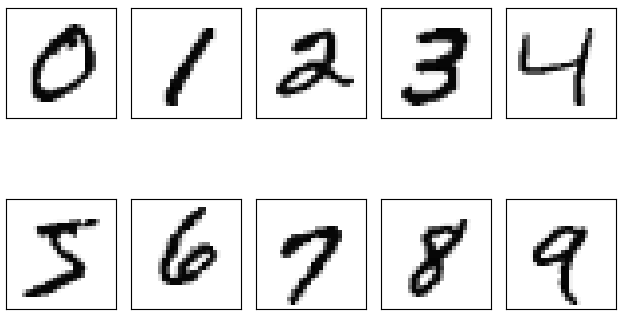

In [66]:
# Import needed libraries (numpy, openml, etc.) #
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

# Print the shapes of the training set and associated labels #
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

#and head to see actual values
print("\nX: { ", X[:1], " }")
print("\ny: { ", y[:1], " }")

# Note: Image pixels are generally [0,255], let's rescale them to be [-1,1] #
# Doesn't really matter with tree-based methods but still a good habbit #
print("\n")
X = X / 127.5 - 1
display(X)

X shape: (70000, 784)
y shape: (70000,)

X: {  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
  247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
  170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
    0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
   82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

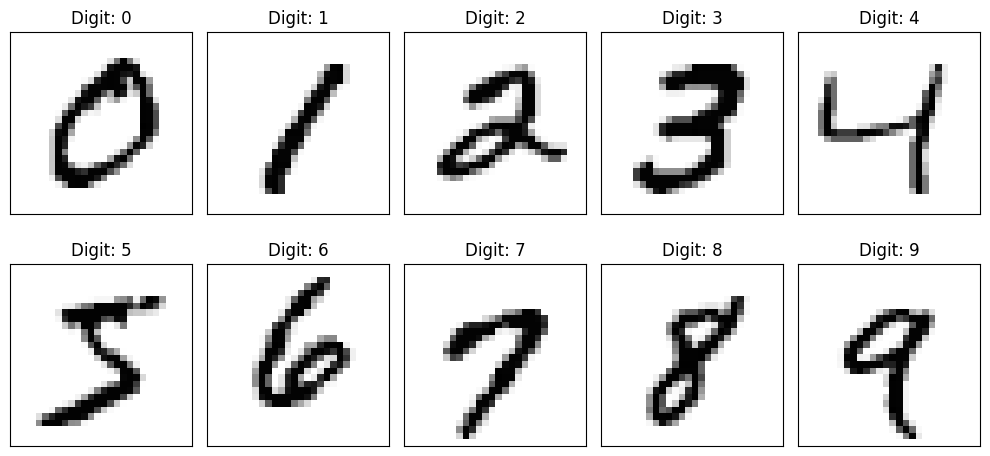


 Number of features per observation: 784

 These features represent the pixel intensity values of the 28x28 images.

 Number of classes: 10

 Number of observations: 70000


In [67]:
# Let's have a look at a few of the digits #
# Create a 2 x 5 subplot

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

# Find one example of each digit (0-9)
unique_digits = np.unique(y)
for i, digit in enumerate(unique_digits):
    # Find the index of the first occurrence of the digit
    idx = np.where(y == digit)[0][0]
    # Reshape the image data and display it
    image_2d = X[idx].reshape(28, 28)
    axes[i].imshow(image_2d, cmap='Greys')
    axes[i].set_title(f'Digit: {digit}')
    axes[i].set_xticks([]);axes[i].set_yticks([])
    #axes[i].axis('off')

plt.tight_layout()
plt.show()

# Questions: How many features are there per observation?
print(f'\n Number of features per observation: {X.shape[1]}')
# What do these features represent?
print('\n These features represent the pixel intensity values of the 28x28 images.')
# How many classes?
print(f'\n Number of classes: {len(unique_digits)}')
# How many observations are in the data?
print(f'\n Number of observations: {X.shape[0]}')

## Problem A.1 Discussion:
1. How many features are there per observation?  
There are 784 features per observation.
2. What do these features represent?  
These features represent the pixel intensity values of the 28x28 grayscale images of the handwritten digits.
3. How many classes?  
There are 10 classes, corresponding to the digits 0 through 9.
4. How many observations are in the data?  
The dataset contains 70,000 observations.  
**Observations**:  
The plot displays a sample image for each digit from 0 to 9, the dataset  contains a variety of handwritten styles for each digit.

2 (20pts). Now let's see how much variation there is between the digits

* Write a code chunk to display a 25 x 25 grid of images where the user selects what digit they want to see

* <u><b>Questions:</b> Do all the digits look the same?  What digits have the most variability (and as a result might be difficult to classify?)</u>

* Your plot should look something like this for the digit=5:

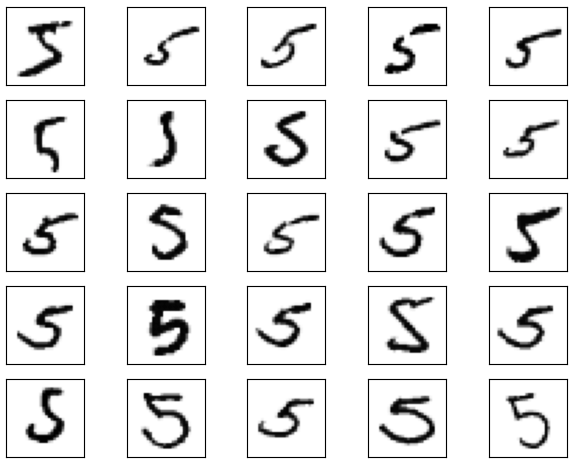

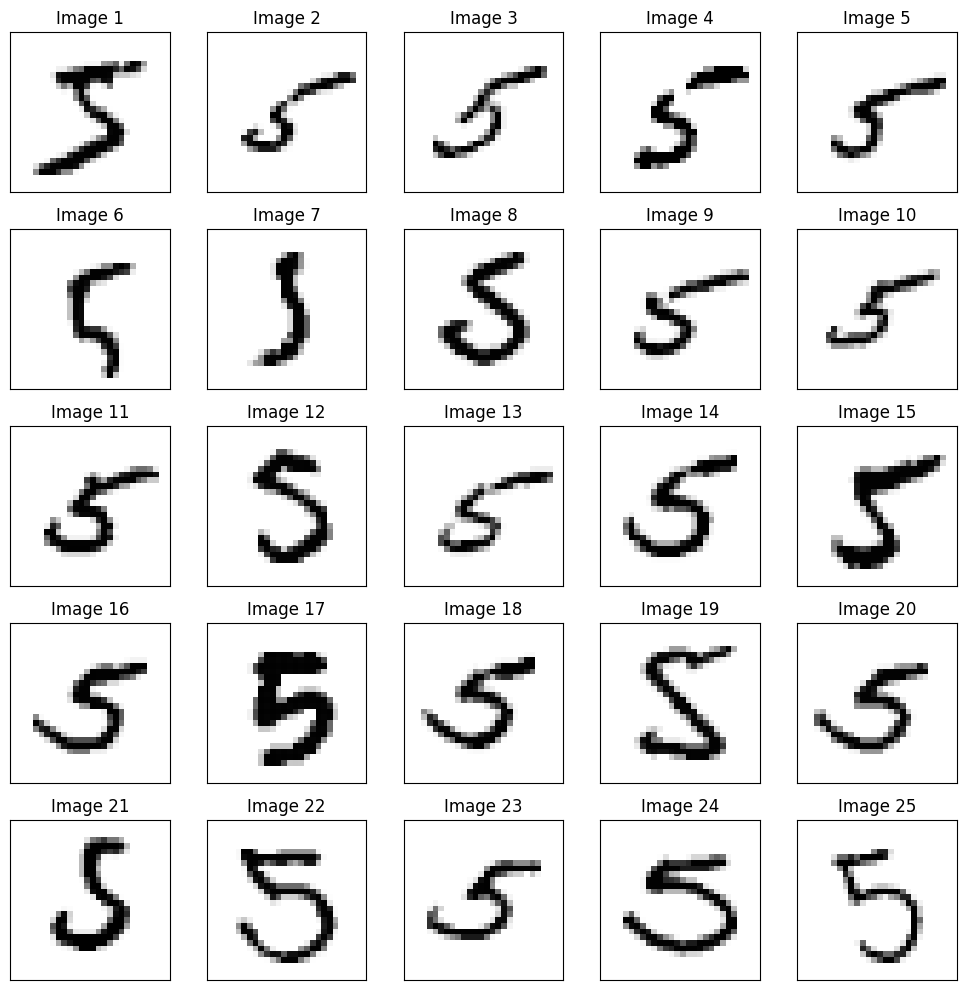

In [68]:
#2 (20pts). Now let's see how much variation there is between the digits

#Write a code chunk to display a 25 x 25 grid of images where the user selects what digit they want to see

# Let's look at the variations between a single digit (0-9) #

digit_to_display = 5 # Change this number to display a different digit

# Find all images for the selected digit
digit_images = X[y == digit_to_display]

# Plot 25 different observations from a digit of your choice #
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    # Reshape the image data and display it
    image_2d = digit_images[i].reshape(28, 28)
    axes[i].imshow(image_2d, cmap='Greys')
    axes[i].set_xticks([]);axes[i].set_yticks([])
    axes[i].set_title(f'Image {i+1}') #thank you Jacob for teaching me this interpolation!

plt.tight_layout()
plt.show()

## Problem A.2 Discussion:
1. **Do all the digits look the same?**  
Based on the visualization of multiple examples of each digit, it is clear that not all digits look the same. There is significant variation in how individuals write the same digit.
2. **What digits have the most variability (and as a result might be difficult to classify?)**  
Digits like '3', '5', '8', and '9' show considerably more variation in their shapes and strokes. This higher variability suggests that these digits might be more challenging for a classifier to accurately identify compared to the less variable digits. However, Digits like '0' and '1' tend to have less variability, often appearing consistently round or as a straight line.


## Let's get the data ready for building a classifier

3 (30pts). Using the train_test_split in sklearn, split the dataset into a training set and testing set

* It's common for MNIST to train on 60k digits and test on 10k digits
* Be sure to use stratificaiton and random state
* <u> Discuss how well the classifier works, training time for different IG metrics, depth, etc.</u>

### Once the data is ready, let's build the tree
* Using sklearn, build a tree classifier on the training data
    - Start with a max depth of 5 and slowly work up to see how it effects the classification accuracy
    - Be sure to **plot the actual tree and print the classification report**
    - Finally, write a script to randomly grab a test image, and have your tree do a prediction:
        - Create a 2 x 6 grid of images where the top row is the test image, and directly below is what your classifier predicted (this can be the first image coorisponding to the predicted label)

* Your tree should look something like this:

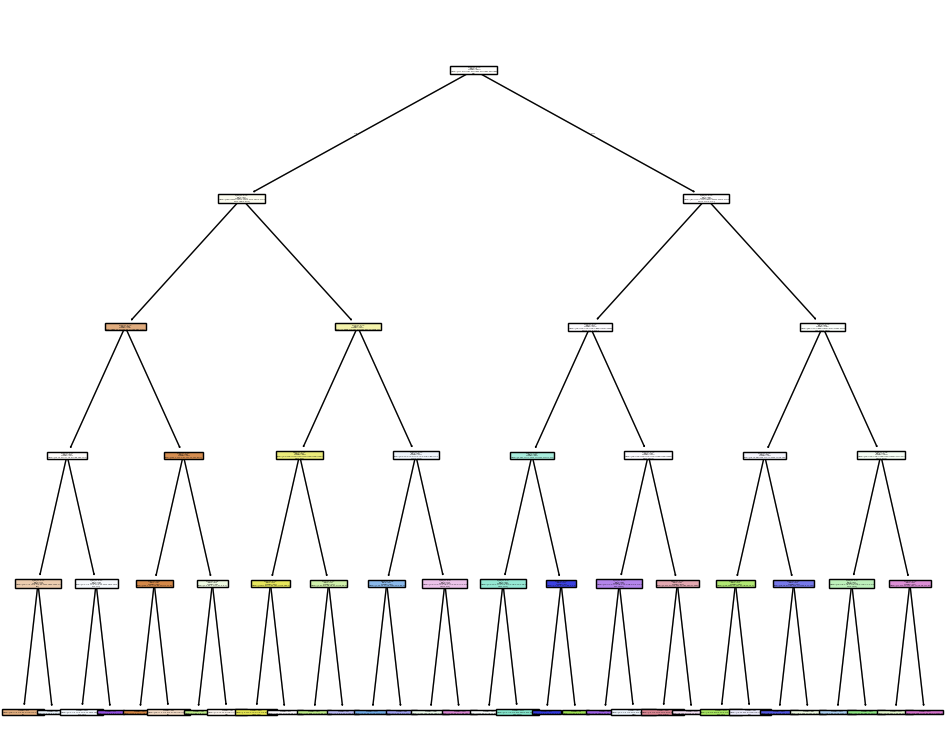

* Your predictions should look like this:
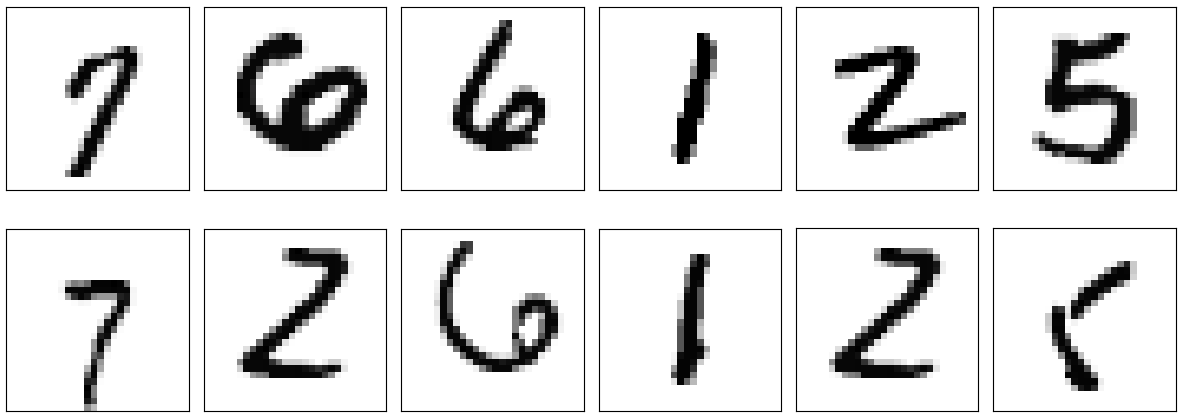


In [69]:
# Let's split the dataset into training/testing #
# It's common for MNIST to use 60k digits for training and 10k digits for testing #

# Necesary libraries to split the data
from sklearn.model_selection import train_test_split

# Split the data into training vs. testing #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# optional to free up some memory by deleting non-used arrays:
#del X, y

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


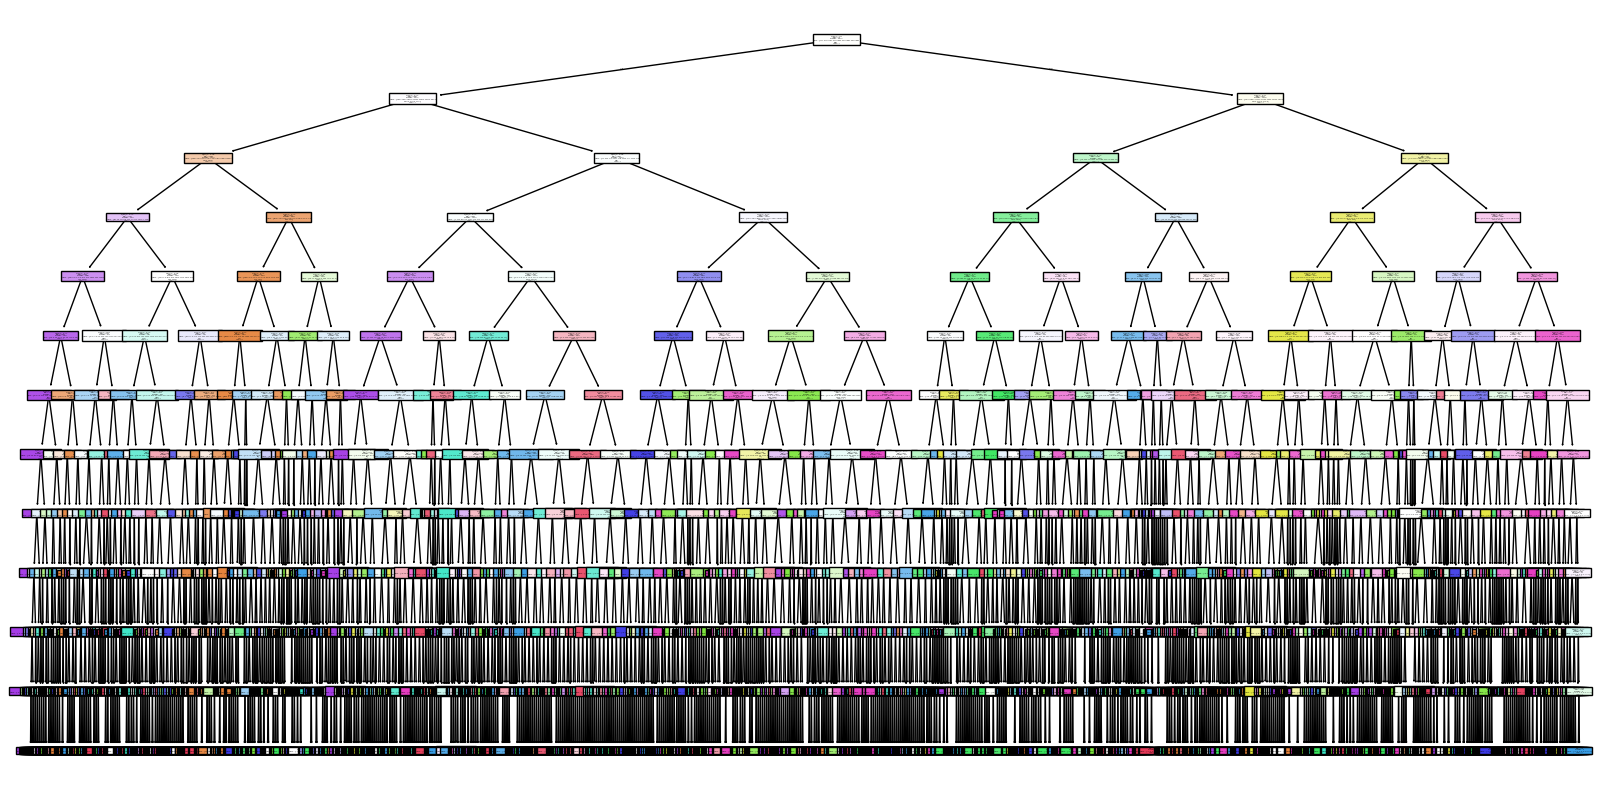

In [70]:
# Let's see if we can train a decision tree classifier for MNIST #
# Play with the depth of the tree, but realize the computational cost and overfitting comes at the expense of depth #
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth=12, random_state=42)
tree_classifier.fit(X_train, y_train)

# plotting the actual tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, filled=True, feature_names=None, class_names=[str(i) for i in range(10)]) # 0 to 9
plt.show()


In [71]:
# Let's look at the predicition accuracy (note: we didn't use the scaled features - it's not important for this particular dataset #
from sklearn.metrics import classification_report
# Predict for all samples #
y_pred = tree_classifier.predict(X_test)
# Get entire report of results #
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       986
           1       0.96      0.96      0.96      1125
           2       0.86      0.88      0.87       999
           3       0.85      0.85      0.85      1020
           4       0.86      0.85      0.86       975
           5       0.84      0.81      0.82       902
           6       0.90      0.90      0.90       982
           7       0.91      0.91      0.91      1042
           8       0.85      0.82      0.83       975
           9       0.81      0.83      0.82       994

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



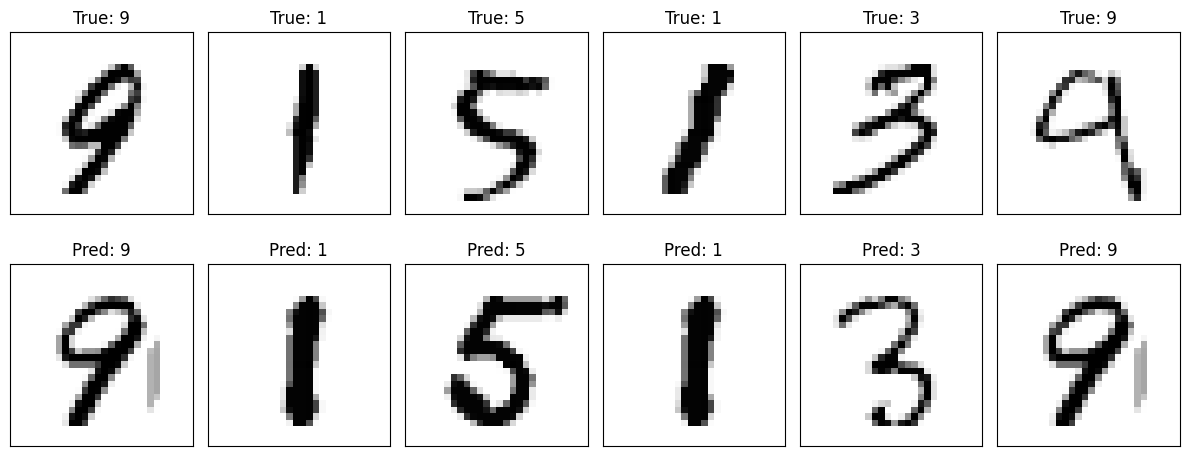

In [72]:
## Let's look at a couple predicted values vs. actual values #
## Plot a 2 x 6 subplot collection where the top row are random draws from X_test #
## and the bottom row is the predicted value (index into X_train for that predicted value) #
import matplotlib.pyplot as plt
import numpy as np

# Set up the subplot figure/axis #
fig, axes = plt.subplots(2, 6, figsize=(12, 5))
axes = axes.ravel()

# Loop through the test set to randomly grab an observation and do a prediction on that observation #
# Plot the observation on the top row and corresponding prediction below it #

for i in range(6):
    # Randomly select an index from the test set
    idx = np.random.randint(0, len(X_test))

    # Get the test image and its true label
    test_image = X_test[idx]
    true_label = y_test[idx]

    # Get the predicted label from the decision tree
    predicted_label = tree_classifier.predict(test_image.reshape(1, -1))[0]

    # Reshape the test image to 28x28 pixels
    test_image_2d = test_image.reshape(28, 28)

    # Plot the observation on the top row
    axes[i].imshow(test_image_2d, cmap='Greys')
    axes[i].set_title(f'True: {true_label}')
    axes[i].set_xticks([]);axes[i].set_yticks([])
    #axes[i].axis('off')

    # Find an image in the training set that has the same label as the predicted label
    # Find the index of the first occurrence of the predicted label in y_train
    predicted_image_idx = np.where(y_train == predicted_label)[0][0]
    predicted_image_2d = X_train[predicted_image_idx].reshape(28, 28)

    # Plot the corresponding prediction below it
    axes[i + 6].imshow(predicted_image_2d, cmap='Greys')
    axes[i + 6].set_title(f'Pred: {predicted_label}')
    axes[i+6].set_xticks([]);axes[i+6].set_yticks([])
    #axes[i + 6].axis('off')

plt.tight_layout()
plt.show()

## Problem A.3 Discussion:
Based on the **classification report for the decision tree** with a maximum depth of 12, the classifier achieved an overall accuracy of 88%. Looking at the per-digit metrics, the classifier performed very well on some digits like '1' (96% precision and recall), but had slightly lower performance on others such as '5' (84% precision and 81% recall) and '8' (85% precision and 82% recall). This aligns with our earlier observation that some digits have more inherent variability, making them harder to classify.  

While we only trained a tree with a specific depth here, generally, increasing the maximum depth of a decision tree can lead to higher accuracy on the training data but also increases the risk of overfitting to the training data and may lead to longer training times. Conversely, a shallower tree might train faster and generalize better to unseen data but might not capture the complexities in the data as well, resulting in lower accuracy. Different Information Gain (IG) metrics like Gini impurity and entropy can also influence how the tree is built and might lead to slightly different splits and potentially different performance, although the impact might be less significant than the tree's depth for this dataset. To fully understand the effect of these parameters, we would typically train and evaluate models with various settings.



## Let's do all of the same things in problem A.3 but using a random forest classifier
### This may take some time so be weary about the number of trees you choose

4 (30pts). Using the above data, build a random forest classifier

* <u> Discuss how well the classifier works, training time for different IG metrics, depth, number of trees, and compare against a single tree etc.</u>
* **Don't forget to create the same plot where the top row is the test observation and the bottom row is the predicted digit**

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Build the random forest classifier #
# You can play with n_jobs depending on how many cores your system has #
# This parameter will parallelize the tree building #
random_forest_classifier = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=42, n_jobs=100)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=50, n_jobs=100,
                       random_state=42)

In [74]:
# Look at the classification report #
# Predict for all samples #
y_pred_rf = random_forest_classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       986
           1       0.98      0.99      0.99      1125
           2       0.96      0.96      0.96       999
           3       0.95      0.95      0.95      1020
           4       0.97      0.96      0.96       975
           5       0.97      0.96      0.96       902
           6       0.97      0.99      0.98       982
           7       0.97      0.96      0.97      1042
           8       0.96      0.95      0.96       975
           9       0.94      0.94      0.94       994

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



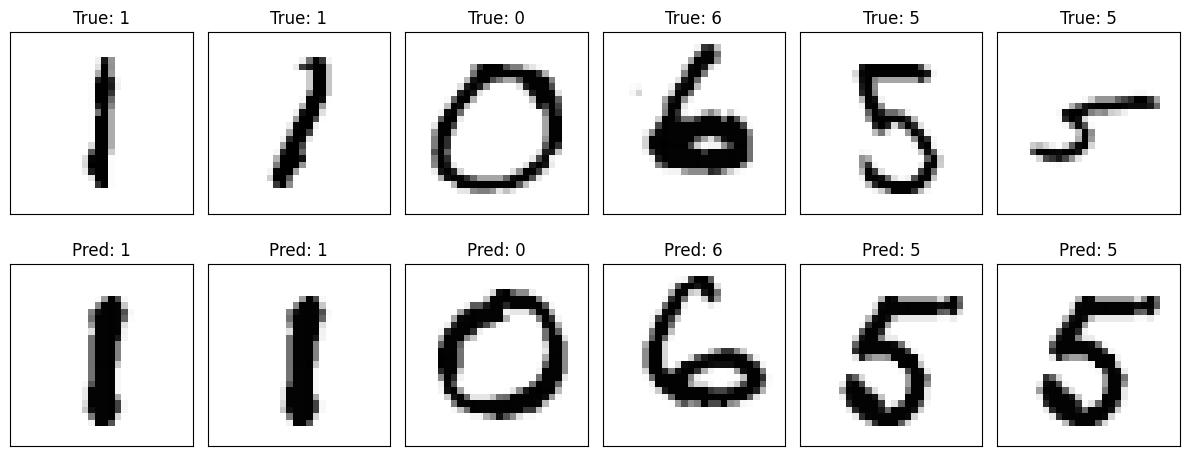

In [75]:
## Look at a couple predicted values vs. actual values #
## Plot a 2 x 6 subplot collection where the top row are random draws from X_test #
## and the bottom row is the predicted value (index into X_train for that predicted value) #
import matplotlib.pyplot as plt
import numpy as np

# Set up the subplot figure/axis #
fig, axes = plt.subplots(2, 6, figsize=(12, 5))
axes = axes.ravel()

# Loop through the test set to randomly grab an observation and do a prediction on that observation #
# Plot the observation on the top row and corresponding prediction below it #

for i in range(6):
    # Randomly select an index from the test set
    idx = np.random.randint(0, len(X_test))

    # Get the test image and its true label
    test_image = X_test[idx]
    true_label = y_test[idx]

    # Get the predicted label from the random forest
    predicted_label = random_forest_classifier.predict(test_image.reshape(1, -1))[0]

    # Reshape the test image to 28x28 pixels
    test_image_2d = test_image.reshape(28, 28)

    # Plot the observation on the top row
    axes[i].imshow(test_image_2d, cmap='Greys')
    axes[i].set_title(f'True: {true_label}')
    axes[i].set_xticks([]);axes[i].set_yticks([])
    #axes[i].axis('off')

    # Find an image in the training set that has the same label as the predicted label
    # Find the index of the first occurrence of the predicted label in y_train
    predicted_image_idx = np.where(y_train == predicted_label)[0][0]
    predicted_image_2d = X_train[predicted_image_idx].reshape(28, 28)

    # Plot the corresponding prediction below it
    axes[i + 6].imshow(predicted_image_2d, cmap='Greys')
    axes[i + 6].set_title(f'Pred: {predicted_label}')
    axes[i + 6].set_xticks([]);axes[i + 6].set_yticks([])
    #axes[i + 6].axis('off')

plt.tight_layout()
plt.show()

## Problem A.4 Discussion:


> Discuss how well the classifier works, training time for different IG metrics, depth, number of trees, and compare against a single tree etc.  

Based on the classification report for the random forest classifier with 50 estimators and a maximum depth of 50, we observe a significant improvement in performance compared to the single decision tree. The overall accuracy increased from 88% to 96%. The precision, recall, and f1-score for individual digits are also generally higher, indicating that the random forest is better at correctly classifying the digits, especially for those that were more challenging for the single tree (like 3, 5, 8, and 9).

In terms of training time, random forests typically take longer to train than a single decision tree because they involve building multiple trees. However, they often provide better generalization and higher accuracy due to the ensemble nature, which reduces overfitting. The number of trees (n_estimators) in a random forest impacts both performance and training time; more trees generally lead to better performance but also longer training times. The maximum depth of the individual trees (max_depth) also plays a role, similar to single decision trees, affecting the complexity of each tree and the risk of overfitting. Different information gain metrics ('gini' and 'entropy') can be used in random forests as well, influencing how each tree is constructed, though the overall impact on the final ensemble might be less pronounced than the number of trees or depth.

Comparing against a single tree, the random forest's superior performance on this dataset highlights the power of ensemble methods in improving classification accuracy by combining the predictions of multiple models.








## CSC 549 Students Only!

# Graduate Students Get A Break This Week - No Extra Work!

In [76]:
# special thanks to Jacob James for showing me the interpolation of string in python!
percentage = 0.6566787; p2= 0.9999
print(f"my value p1: {percentage:.3%}! percentage 2: {p2:.2%}!" )


my value p1: 65.668%! percentage 2: 99.99%!
